In [1]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
train_data = sns.load_dataset('titanic')

In [3]:
print(train_data.shape)

(891, 15)


In [4]:
train_data.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [5]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [6]:
train_data.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [7]:
print(train_data.dtypes)


survived          int64
pclass            int64
sex              object
age             float64
sibsp             int64
parch             int64
fare            float64
embarked         object
class          category
who              object
adult_male         bool
deck           category
embark_town      object
alive            object
alone              bool
dtype: object


In [8]:
print(train_data.columns)

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town',
       'alive', 'alone'],
      dtype='object')


In [9]:
print(train_data.nunique())

survived         2
pclass           3
sex              2
age             88
sibsp            7
parch            7
fare           248
embarked         3
class            3
who              3
adult_male       2
deck             7
embark_town      3
alive            2
alone            2
dtype: int64


In [10]:
train_data.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [11]:
train_data['age'].fillna(train_data['age'].median(), inplace=True)

In [12]:
train_data['embarked'].fillna(train_data['embarked'].mode()[0], inplace=True)

In [13]:
train_data.drop(columns=['deck'], inplace=True)

In [14]:
train_data.dropna(subset=['embark_town', 'alive'], inplace=True)

In [15]:
train_data['family_size'] = train_data['sibsp'] + train_data['parch'] + 1

In [16]:
train_data['age_group'] = pd.cut(train_data['age'], bins=[0, 12, 18, 35, 60, 100], labels=['Child', 'Teen', 'Adult', 'Middle-Aged', 'Senior'])

In [17]:
sns.set_style("whitegrid")

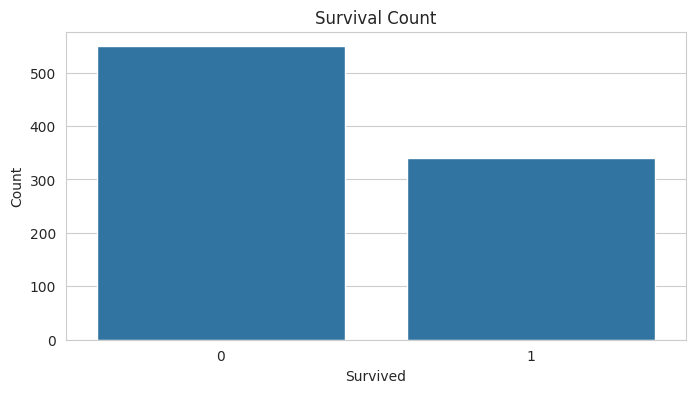

In [18]:
plt.figure(figsize=(8, 4))
sns.countplot(x='survived', data=train_data)
plt.title('Survival Count')
plt.xlabel('Survived')
plt.ylabel('Count')
plt.show()

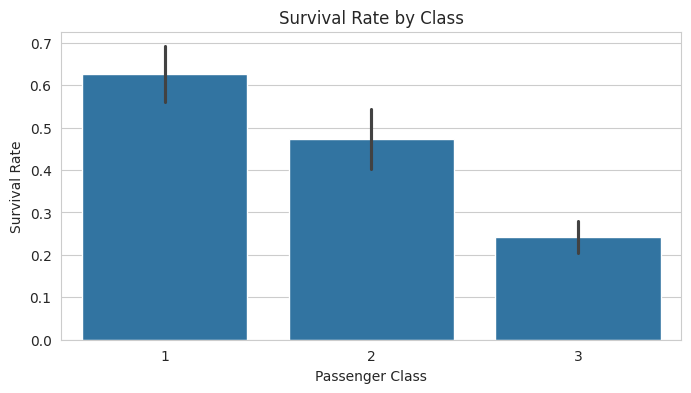

In [19]:
plt.figure(figsize=(8, 4))
sns.barplot(x='pclass', y='survived', data=train_data)
plt.title('Survival Rate by Class')
plt.xlabel('Passenger Class')
plt.ylabel('Survival Rate')
plt.show()

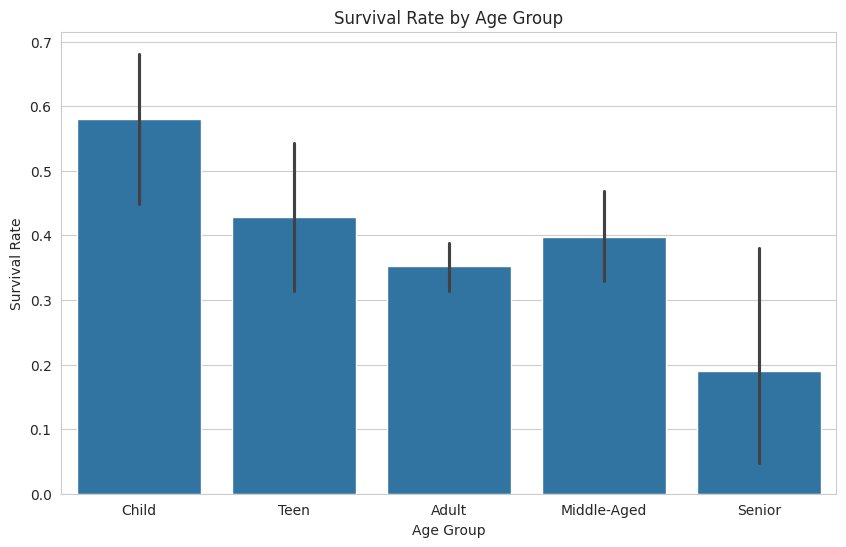

In [20]:
plt.figure(figsize=(10, 6))
sns.barplot(x='age_group', y='survived', data=train_data)
plt.title('Survival Rate by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Survival Rate')
plt.show()

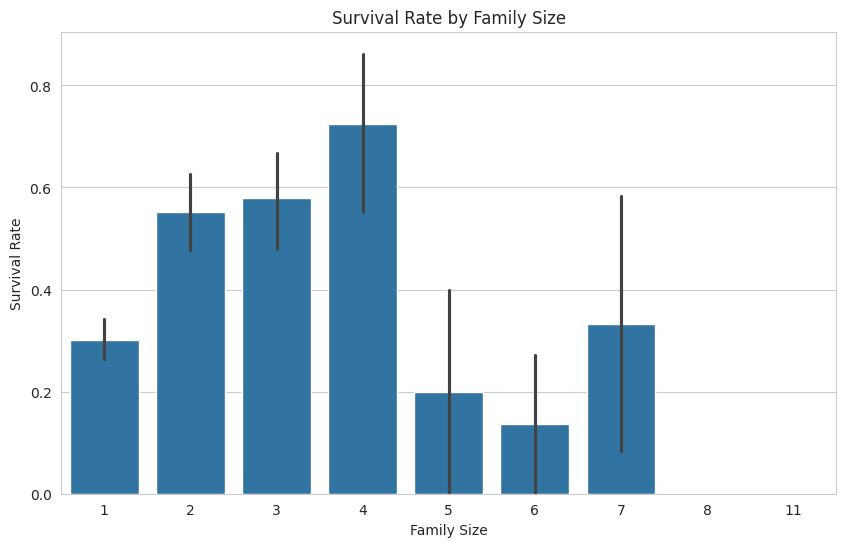

In [21]:
plt.figure(figsize=(10, 6))
sns.barplot(x='family_size', y='survived', data=train_data)
plt.title('Survival Rate by Family Size')
plt.xlabel('Family Size')
plt.ylabel('Survival Rate')
plt.show()

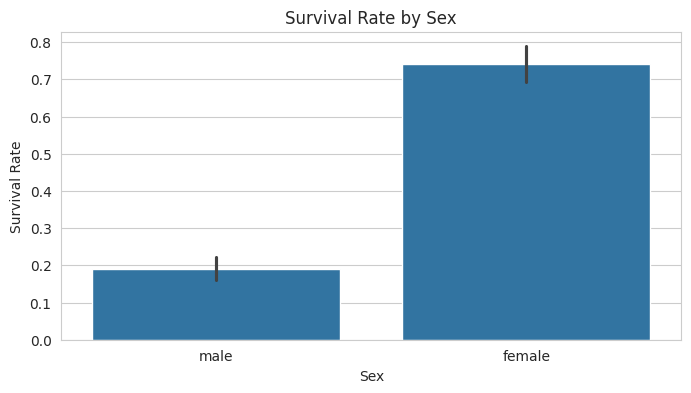

In [22]:
plt.figure(figsize=(8, 4))
sns.barplot(x='sex', y='survived', data=train_data)
plt.title('Survival Rate by Sex')
plt.xlabel('Sex')
plt.ylabel('Survival Rate')
plt.show()

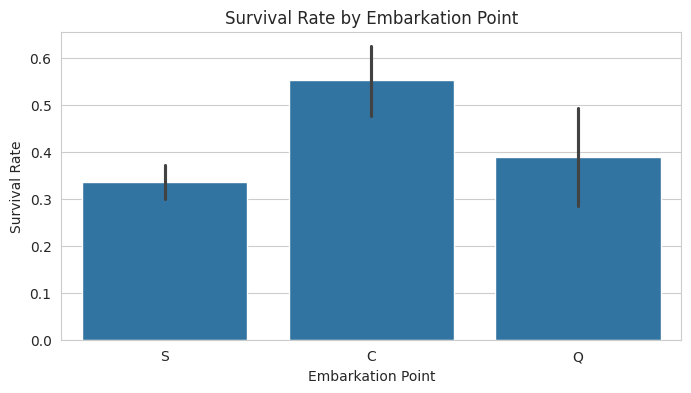

In [23]:
plt.figure(figsize=(8, 4))
sns.barplot(x='embarked', y='survived', data=train_data)
plt.title('Survival Rate by Embarkation Point')
plt.xlabel('Embarkation Point')
plt.ylabel('Survival Rate')
plt.show()

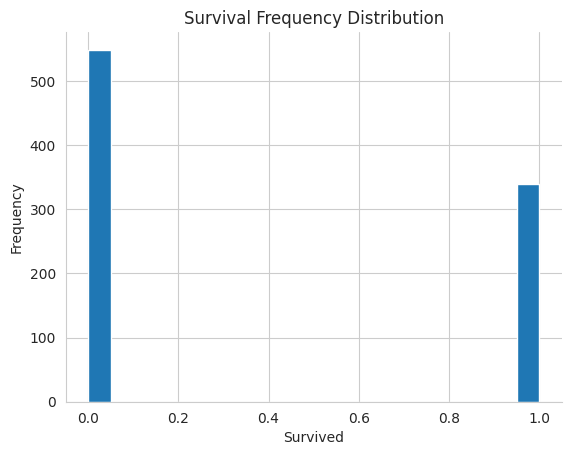

In [24]:
train_data['survived'].plot(kind='hist', bins=20, title='Survived')
plt.gca().spines[['top', 'right']].set_visible(False)
plt.title('Survival Frequency Distribution')
plt.xlabel('Survived')
plt.ylabel('Frequency')
plt.show()

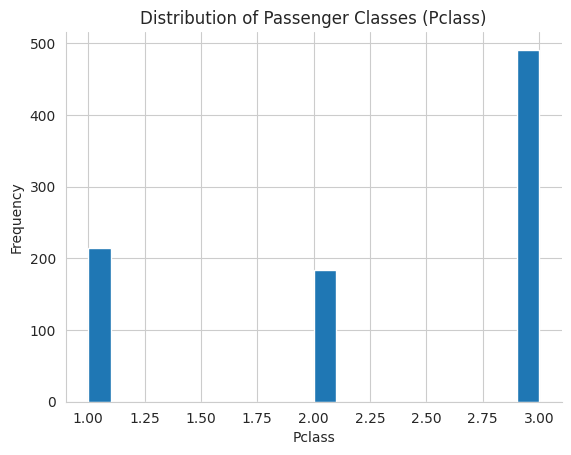

In [25]:
train_data['pclass'].plot(kind='hist', bins=20, title='Pclass')
plt.gca().spines[['top', 'right']].set_visible(False)
plt.title('Distribution of Passenger Classes (Pclass)')
plt.xlabel('Pclass')
plt.ylabel('Frequency')
plt.show()

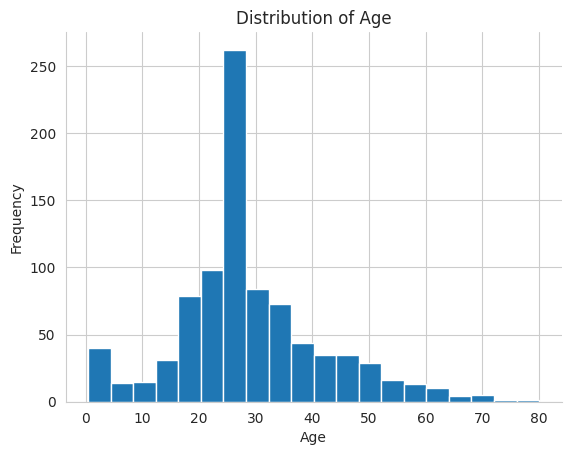

In [26]:
train_data['age'].plot(kind='hist', bins=20, title='Age')
plt.gca().spines[['top', 'right']].set_visible(False)
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

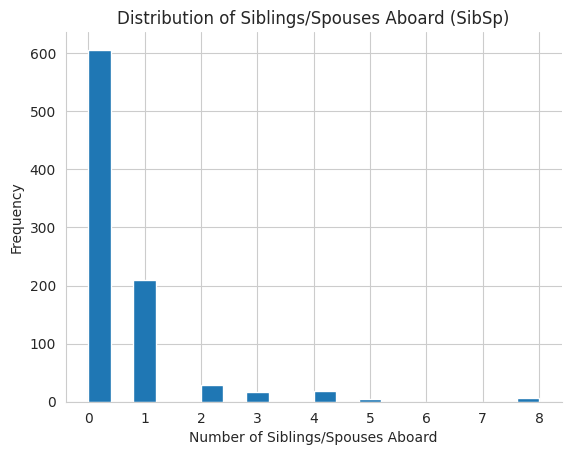

In [27]:
train_data['sibsp'].plot(kind='hist', bins=20, title='SibSp')
plt.gca().spines[['top', 'right']].set_visible(False)
plt.title('Distribution of Siblings/Spouses Aboard (SibSp)')
plt.xlabel('Number of Siblings/Spouses Aboard')
plt.ylabel('Frequency')
plt.show()

<ipython-input-28-c30d0de336ce>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sex_counts.index, y=sex_counts.values, palette='Dark2')


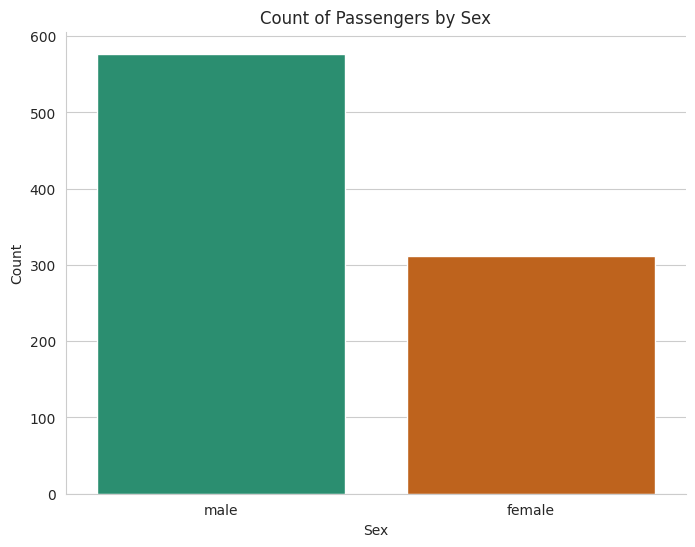

In [28]:
sex_counts = train_data['sex'].value_counts()

plt.figure(figsize=(8, 6))
sns.barplot(x=sex_counts.index, y=sex_counts.values, palette='Dark2')
plt.gca().spines[['top', 'right']].set_visible(False)

plt.xlabel('Sex')
plt.ylabel('Count')
plt.title('Count of Passengers by Sex')
plt.show()

<ipython-input-29-4fcd177e2f85>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(train_data, x='survived', y='who', inner='box', palette='Dark2')


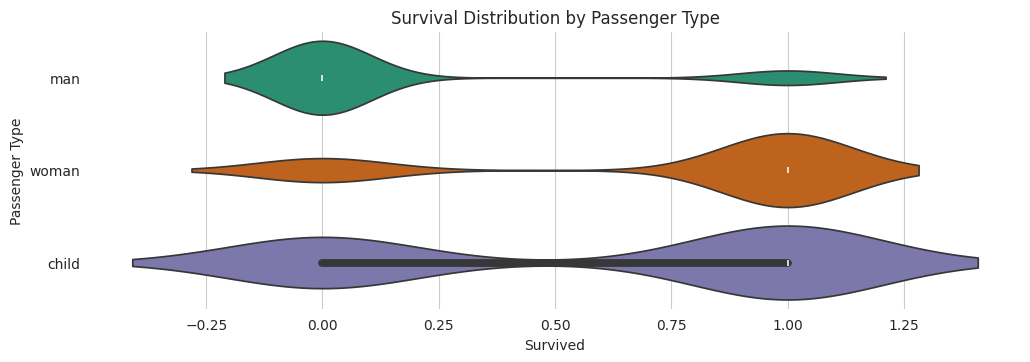

In [29]:
figsize = (12, 1.2 * len(train_data['who'].unique()))

plt.figure(figsize=figsize)

sns.violinplot(train_data, x='survived', y='who', inner='box', palette='Dark2')

sns.despine(top=True, right=True, bottom=True, left=True)
plt.xlabel('Survived')
plt.ylabel('Passenger Type')
plt.title('Survival Distribution by Passenger Type')
plt.show()

<ipython-input-30-1c74eb5be71f>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(train_data, x='survived', y='embarked', inner='box', palette='Dark2')


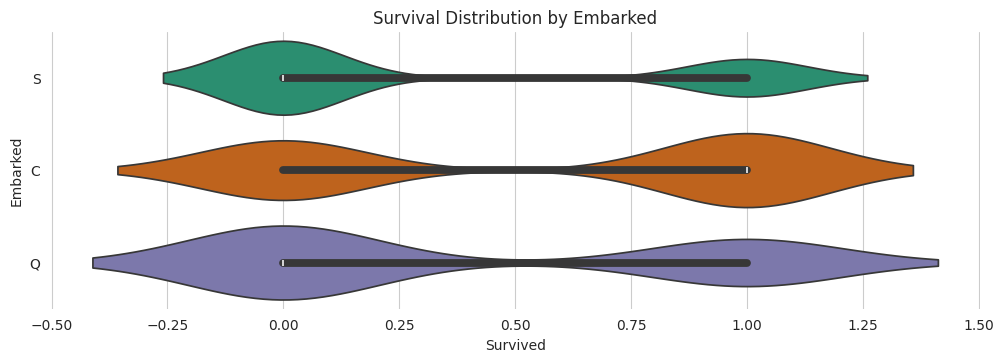

In [30]:
figsize = (12, 1.2 * len(train_data['embarked'].unique()))

plt.figure(figsize=figsize)

sns.violinplot(train_data, x='survived', y='embarked', inner='box', palette='Dark2')

sns.despine(top=True, right=True, bottom=True, left=True)
plt.xlabel('Survived')
plt.ylabel('Embarked')
plt.title('Survival Distribution by Embarked')
plt.show()

<ipython-input-31-577654d1ed8b>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(train_data, x='survived', y='sex', inner='box', palette='Dark2')


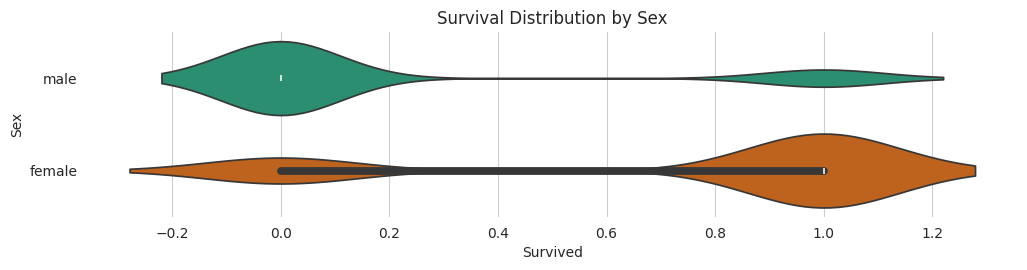

In [31]:
figsize = (12, 1.2 * len(train_data['sex'].unique()))

plt.figure(figsize=figsize)

sns.violinplot(train_data, x='survived', y='sex', inner='box', palette='Dark2')

sns.despine(top=True, right=True, bottom=True, left=True)
plt.xlabel('Survived')
plt.ylabel('Sex')
plt.title('Survival Distribution by Sex')
plt.show()

<ipython-input-32-15399aef8de5>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(train_data, x='survived', y='adult_male', inner='box', palette='Dark2')


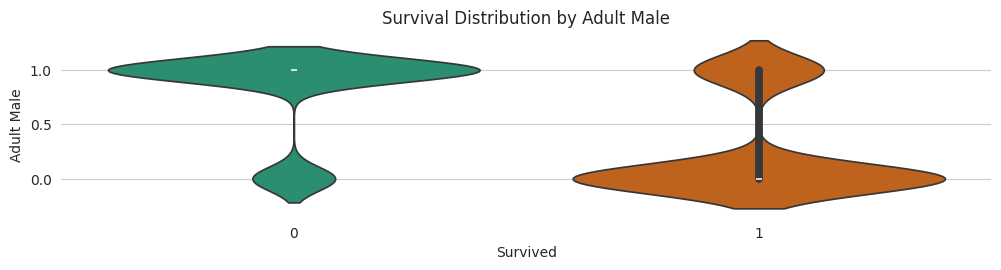

In [32]:
figsize = (12, 1.2 * len(train_data['adult_male'].unique()))

plt.figure(figsize=figsize)

sns.violinplot(train_data, x='survived', y='adult_male', inner='box', palette='Dark2')

sns.despine(top=True, right=True, bottom=True, left=True)
plt.xlabel('Survived')
plt.ylabel('Adult Male')
plt.title('Survival Distribution by Adult Male')
plt.show()

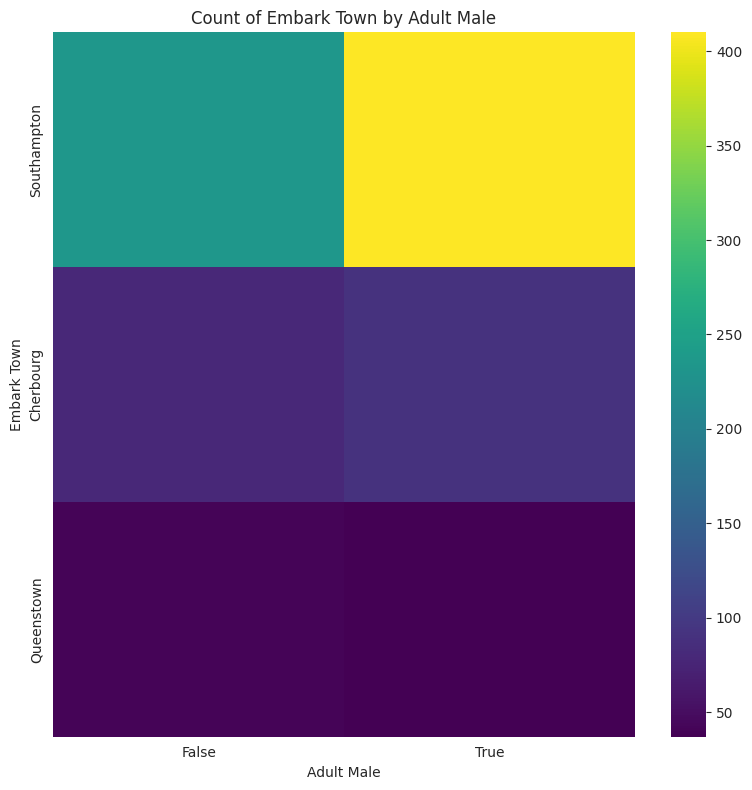

In [33]:
plt.subplots(figsize=(8, 8))

df_2dhist = pd.DataFrame({
    x_label: grp['embark_town'].value_counts()
    for x_label, grp in train_data.groupby('adult_male')
})

sns.heatmap(df_2dhist, cmap='viridis')
plt.title('Count of Embark Town by Adult Male')
plt.xlabel('Adult Male')
plt.ylabel('Embark Town')
plt.tight_layout()
plt.show()

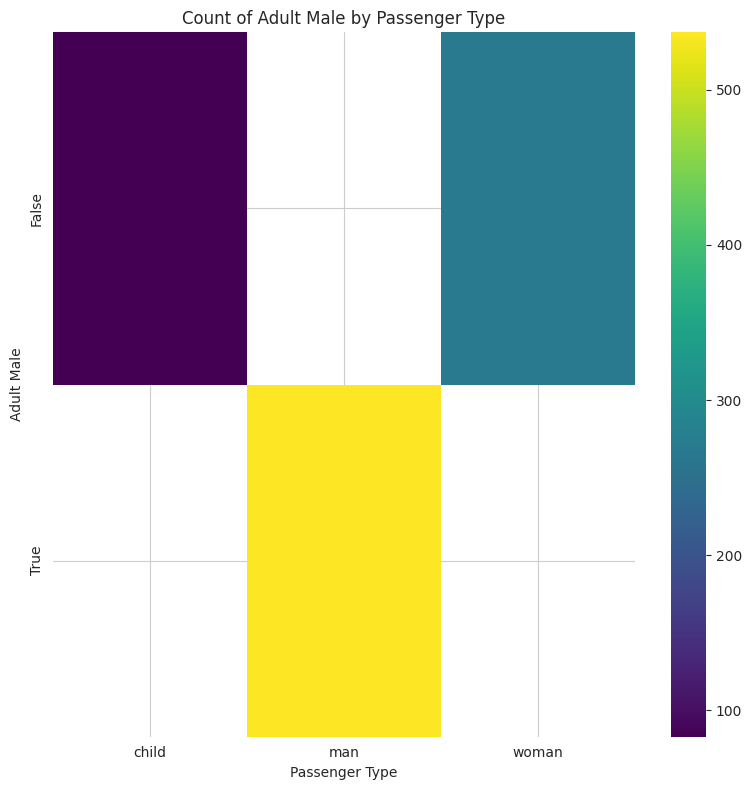

In [34]:
plt.subplots(figsize=(8, 8))

df_2dhist = pd.DataFrame({
    x_label: grp['adult_male'].value_counts()
    for x_label, grp in train_data.groupby('who')
})

sns.heatmap(df_2dhist, cmap='viridis')
plt.title('Count of Adult Male by Passenger Type')
plt.xlabel('Passenger Type')
plt.ylabel('Adult Male')
plt.tight_layout()
plt.show()

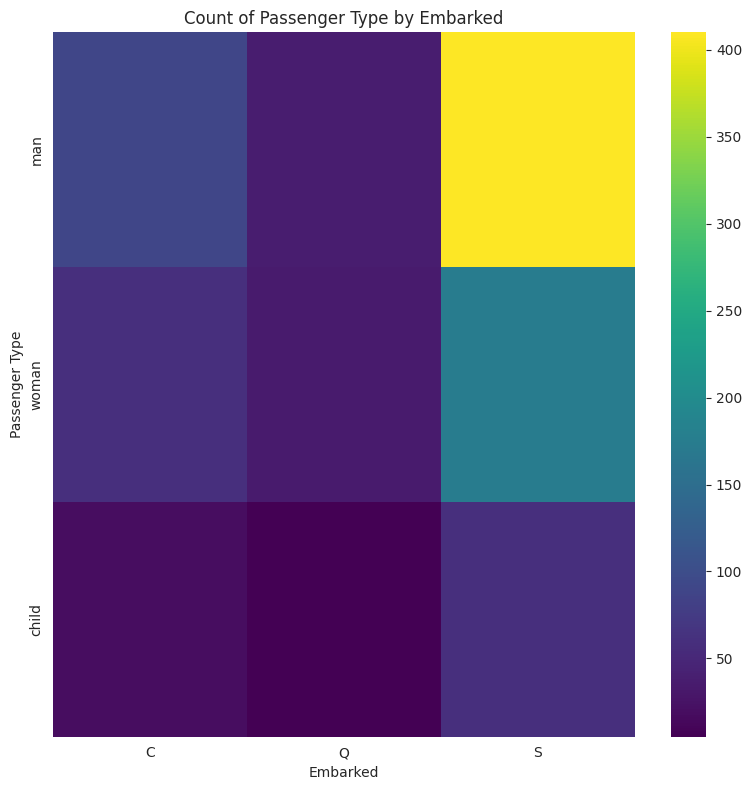

In [35]:
plt.subplots(figsize=(8, 8))

df_2dhist = pd.DataFrame({
    x_label: grp['who'].value_counts()
    for x_label, grp in train_data.groupby('embarked')
})

sns.heatmap(df_2dhist, cmap='viridis')
plt.title('Count of Passenger Type by Embarked')
plt.xlabel('Embarked')
plt.ylabel('Passenger Type')
plt.tight_layout()
plt.show()

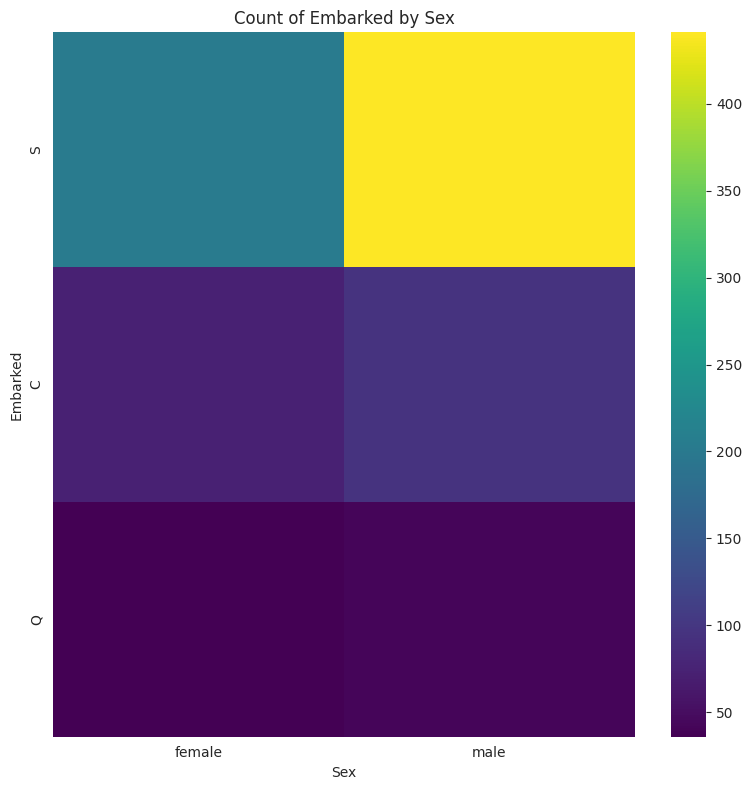

In [36]:
plt.subplots(figsize=(8, 8))

df_2dhist = pd.DataFrame({
    x_label: grp['embarked'].value_counts()
    for x_label, grp in train_data.groupby('sex')
})

sns.heatmap(df_2dhist, cmap='viridis')
plt.title('Count of Embarked by Sex')
plt.xlabel('Sex')
plt.ylabel('Embarked')
plt.tight_layout()
plt.show()

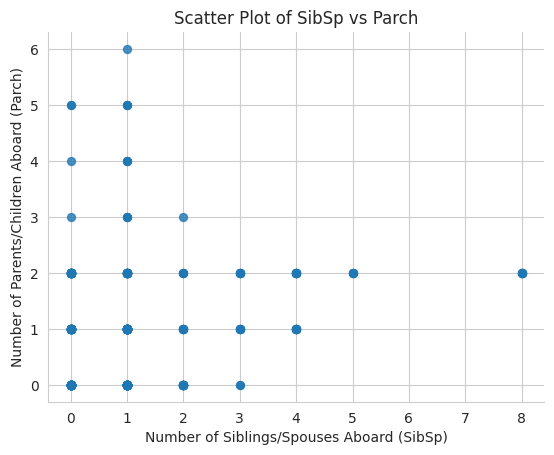

In [37]:
train_data.plot(kind='scatter', x='sibsp', y='parch', s=32, alpha=.8)

plt.gca().spines[['top', 'right']].set_visible(False)
plt.title('Scatter Plot of SibSp vs Parch')
plt.xlabel('Number of Siblings/Spouses Aboard (SibSp)')
plt.ylabel('Number of Parents/Children Aboard (Parch)')
plt.show()

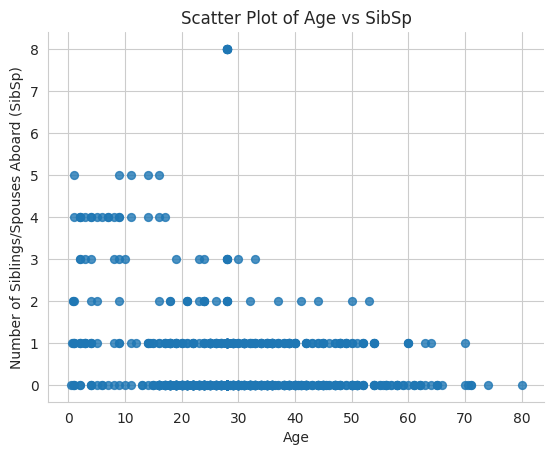

In [38]:
train_data.plot(kind='scatter', x='age', y='sibsp', s=32, alpha=.8)

plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.title('Scatter Plot of Age vs SibSp')
plt.xlabel('Age')
plt.ylabel('Number of Siblings/Spouses Aboard (SibSp)')
plt.show()

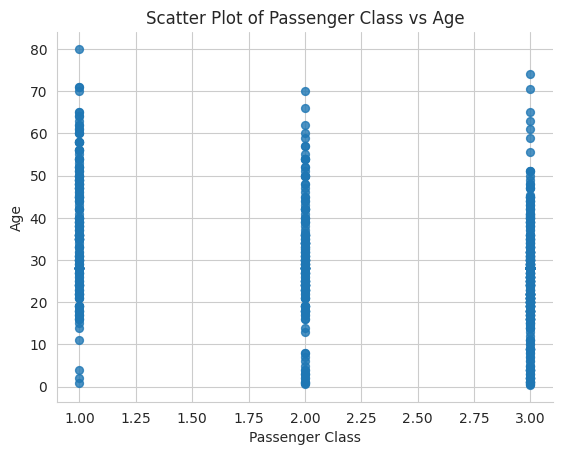

In [39]:
train_data.plot(kind='scatter', x='pclass', y='age', s=32, alpha=0.8)

plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.title('Scatter Plot of Passenger Class vs Age')
plt.xlabel('Passenger Class')
plt.ylabel('Age')
plt.show()

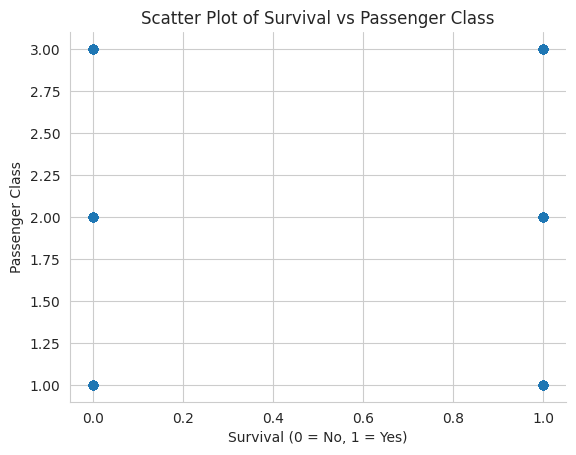

In [40]:
train_data.plot(kind='scatter', x='survived', y='pclass', s=32, alpha=0.8)

plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.title('Scatter Plot of Survival vs Passenger Class')
plt.xlabel('Survival (0 = No, 1 = Yes)')
plt.ylabel('Passenger Class')
plt.show()

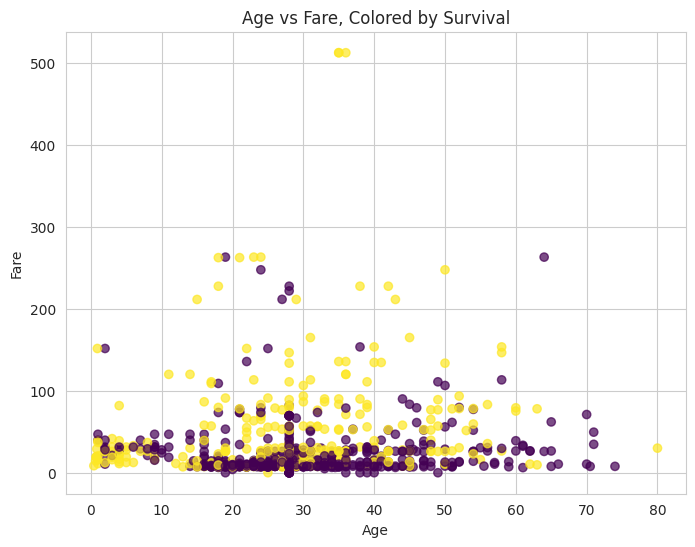

In [41]:
plt.figure(figsize=(8, 6))
plt.scatter(train_data['age'], train_data['fare'], c=train_data['survived'], cmap='viridis', alpha=0.7)

plt.xlabel('Age')
plt.ylabel('Fare')
plt.title('Age vs Fare, Colored by Survival')
plt.show()

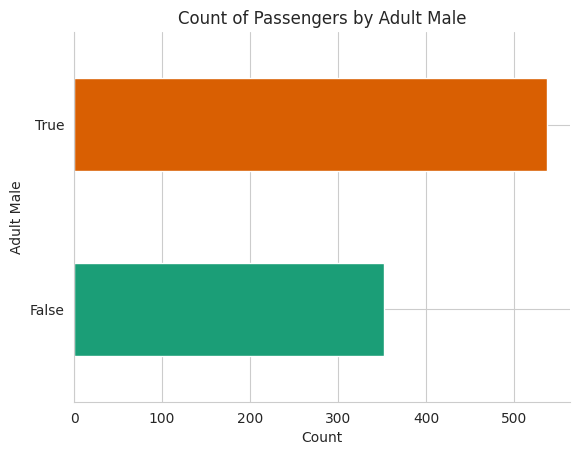

In [42]:
train_data.groupby('adult_male').size().plot(kind='barh', color=sns.color_palette('Dark2'))

plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.title('Count of Passengers by Adult Male')
plt.xlabel('Count')
plt.ylabel('Adult Male')
plt.show()

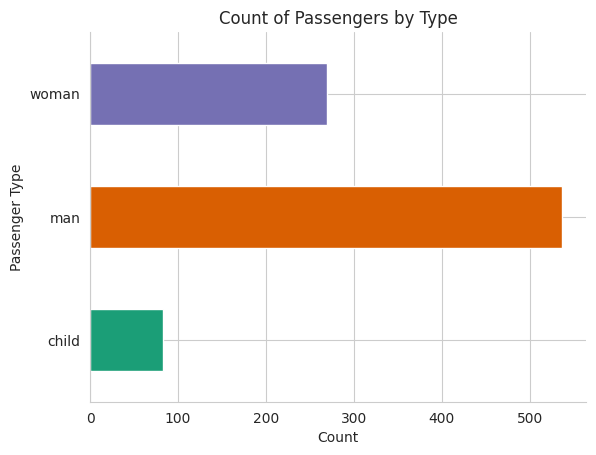

In [43]:
train_data.groupby('who').size().plot(kind='barh', color=sns.color_palette('Dark2'))

plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.title('Count of Passengers by Type')
plt.xlabel('Count')
plt.ylabel('Passenger Type')
plt.show()

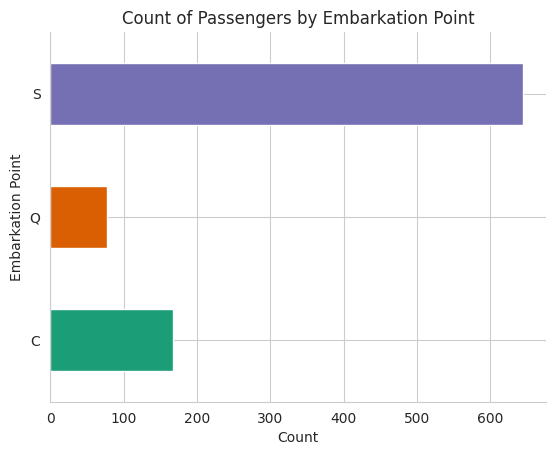

In [44]:
train_data.groupby('embarked').size().plot(kind='barh', color=sns.color_palette('Dark2'))

plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.title('Count of Passengers by Embarkation Point')
plt.xlabel('Count')
plt.ylabel('Embarkation Point')
plt.show()

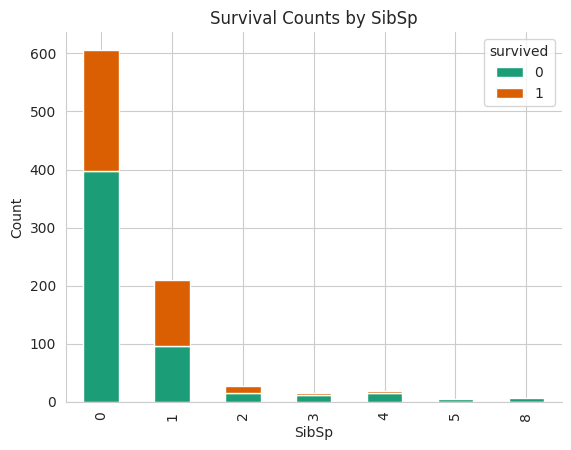

In [45]:
grouped = train_data.groupby(['sibsp', 'survived']).size().unstack()

grouped.plot(kind='bar', stacked=True, color=sns.color_palette('Dark2'))

plt.xlabel('SibSp')
plt.ylabel('Count')
plt.title('Survival Counts by SibSp')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.show()

<ipython-input-46-a5d1b45896c6>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.catplot(x='sibsp', y='survived', kind='bar', data=train_data, palette='Dark2', height=6, aspect=1.5)


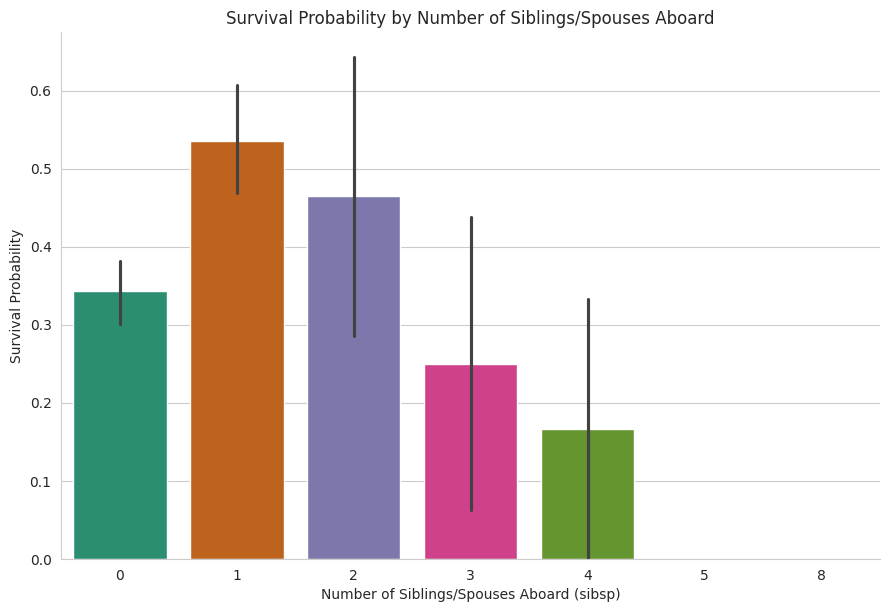

In [46]:
sns.catplot(x='sibsp', y='survived', kind='bar', data=train_data, palette='Dark2', height=6, aspect=1.5)
plt.xlabel('Number of Siblings/Spouses Aboard (sibsp)')
plt.ylabel('Survival Probability')
plt.title('Survival Probability by Number of Siblings/Spouses Aboard')
plt.show()


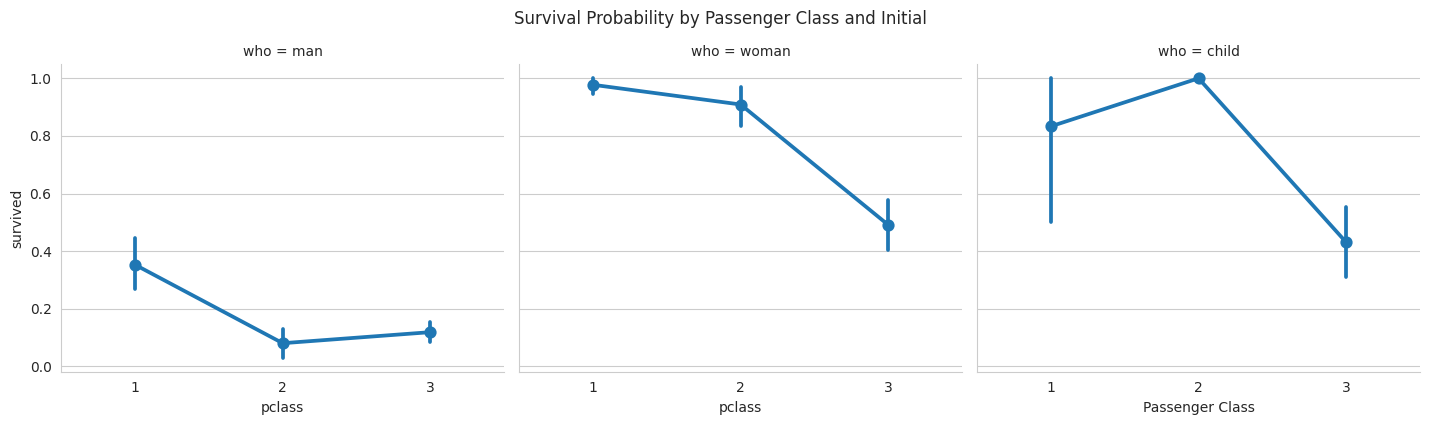

In [47]:
sns.catplot(x='pclass', y='survived', col='who', data=train_data, kind='point', height=4, aspect=1.2, col_wrap=3)

plt.xlabel('Passenger Class')
plt.ylabel('Survival Probability')
plt.suptitle('Survival Probability by Passenger Class and Initial', y=1.05)
plt.show()

In [48]:
cross_tab = pd.crosstab(train_data['who'], train_data['sex']).T

styled_cross_tab = cross_tab.style.background_gradient(cmap='summer_r')
styled_cross_tab

who,child,man,woman
sex,,,
female,43,0,269
male,40,537,0


In [49]:
print('Oldest person who survived was of:', train_data['age'].max())
print('Youngest person who survived was of:', train_data['age'].min())
print('Average age of persons who survived:', train_data['age'].mean())

Oldest person who survived was of: 80.0
Youngest person who survived was of: 0.42
Average age of persons who survived: 29.315151856017994


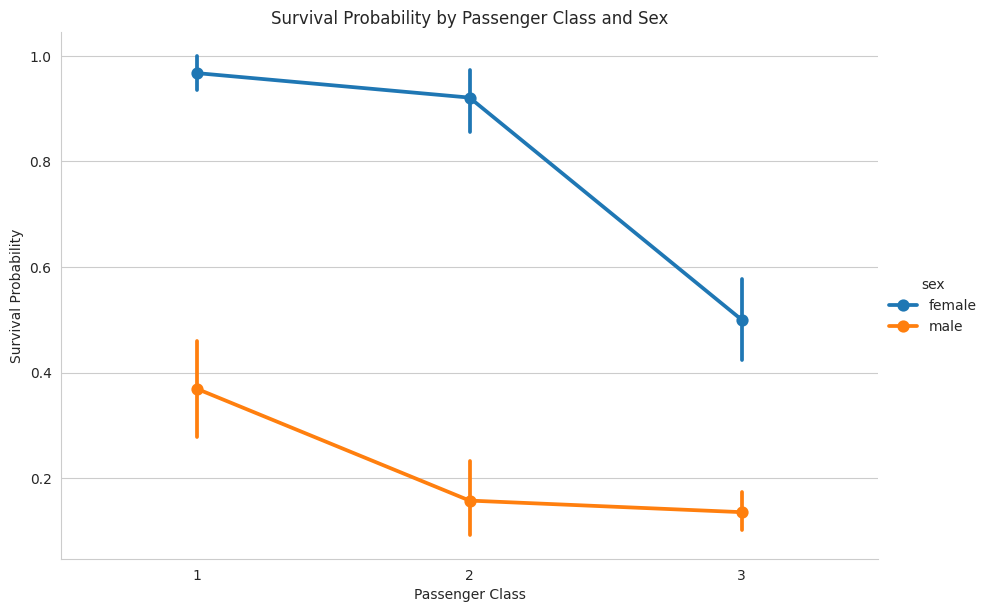

In [50]:
sns.catplot(x='pclass', y='survived', hue='sex', data=train_data, kind='point', height=6, aspect=1.5)

plt.xlabel('Passenger Class')
plt.ylabel('Survival Probability')
plt.title('Survival Probability by Passenger Class and Sex')
plt.show()

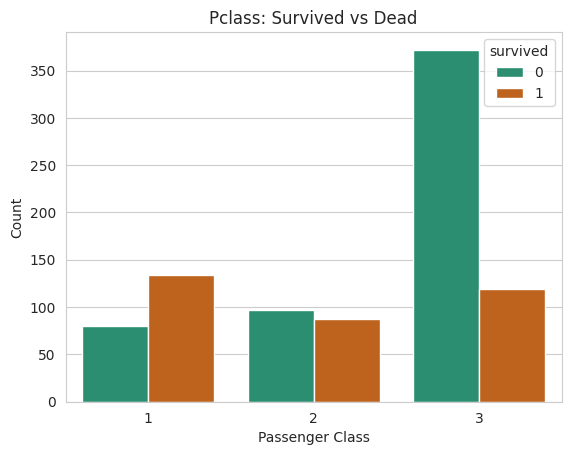

In [51]:
sns.countplot(x='pclass', hue='survived', data=train_data, palette='Dark2')

plt.title('Pclass: Survived vs Dead')
plt.xlabel('Passenger Class')
plt.ylabel('Count')
plt.show()